### 2021 Spring "EE479: Scientific Computing & Data"
#### Yong-Hoon Kim, KAIST Electrical Engineering

#### Linge & Langtagen Ch.4.3.5: 2nd-order Runge-Kutta or Heun's method
#### 2021.03.30 Revised from <osc_Heun.py>

General algorithm:
$$(4.57): 𝑢^∗ = 𝑢^𝑛 + Δ𝑡 \, 𝑓(𝑢^𝑛, 𝑡_𝑛 )$$
$$(4.58): 𝑢^{𝑛+1} = 𝑢^𝑛 + \frac{Δ𝑡}{2} [𝑓(𝑢^𝑛, 𝑡_𝑛 ) + 𝑓(𝑢^∗, 𝑡_{𝑛+1})]$$

To solve:
$$(4.43): u'=v, $$
$$(4.44): v'=-\omega^2 u.$$

Algorithm:
$$𝑢^∗ = 𝑢^𝑛 + Δ𝑡 \, v^𝑛$$
$$v^∗ = v^𝑛 - Δ𝑡 \, \omega^2 \, u^𝑛$$
$$𝑢^{𝑛+1} = 𝑢^𝑛 + \frac{Δ𝑡}{2} [v^𝑛 + v^∗]$$
$$𝑢^{𝑛+1} = 𝑢^𝑛 - \frac{Δ𝑡}{2} \omega^2 [u^𝑛 + u^∗]$$

P  = 3.1415927
dt = 0.0785398
T  = 31.4159265
@osc_Heun: N_t = 400


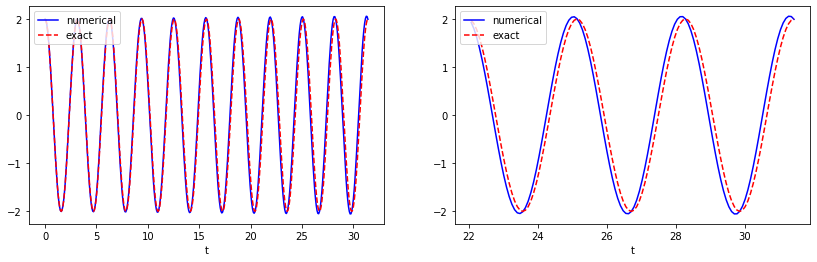

In [25]:
#ode_Heun.py
from numpy import zeros, linspace, pi, cos
import matplotlib.pyplot as plt

def osc_Heun(X_0, omega, dt, T):
    N_t = int(round(T/dt))
    print('@osc_Heun: N_t =', N_t)
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    t = linspace(0, N_t*dt, N_t+1)
    
    # Initial condition
    u[0] = X_0
    v[0] = 0
    
    # Step equations forward in time
    for n in range(N_t):
        u_star = u[n] + dt*v[n]
        v_star = v[n] - dt*omega**2*u[n]
#        print( '%4i %9.5f %9.5f %9.5f %9.5f' % (n, u_star, u[n], v_star, v[n]) )
        u[n+1] = u[n] + 0.5*dt*(v[n] + v_star)
        v[n+1] = v[n] - 0.5*dt*omega**2*(u[n] + u_star)
    return u, v, t

def demo():
    omega = 2
    P = 2*pi/omega
    dt = P/40      # P/40, P/160, P/2000 for comparison
    T = 10*P
    print('P  = %.7f' % P)
    print('dt = %.7f' % dt)
    print('T  = %.7f' % T)
    X_0 = 2
    u, v, t = osc_Heun(X_0, omega, dt, T)
    
    fig = plt.figure(figsize=[14,4])
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    ax1.plot(t, u, 'b-', label='numerical')
    ax1.plot(t, X_0*cos(omega*t), 'r--', label='exact')
#    ax1.set_ylim(-3,3)
    ax1.set_xlabel('t')
    ax1.legend(loc='upper left')

    # Plot the last three periods to illustrate the accuracy in long time simulations
    N3l = int(round(3*P/dt))  # No of intervals to be plotted
    ax2.plot(t[-N3l:], u[-N3l:], 'b-', label='numerical')
    ax2.plot(t[-N3l:], X_0*cos(omega*t)[-N3l:], 'r--', label='exact')
#    ax2.ylim(-3,3)
    ax2.set_xlabel('t')
    ax2.legend(loc='upper left')
    
if __name__ == '__main__':
    demo()
    

We can see that the amplitude grows, but not as much as for the Forward Euler method. However, the Euler-Cromer methid is much better! We should add that in problems where the Forward Euler method gives satisfactory approximations, such as growth/decay problems. 


The 2nd-order Runge-Kutta method or Heun's method, usually works considerably better and produces greater accuracy for the same computational cost. It is therefore a very valuable method to be aware of, although it cannot compute with the Euler-Cromer scheme for oscillation problems. The derivation of the RK2/Heun scheme is also good general training in "numerical thinking"